In [1]:
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pylab as plt

In [14]:
matplotlib.rc('figure', figsize=(15, 10))

In [15]:
#each of the 3IFS runs (2.8km.4km,9km) is stored in one zarr
ds_ifs = xr.open_zarr('/work/bm1235/a270046/cycle2-sync/ddh_output/4km')

In [16]:
# ds_icon = xr.open_zarr('/work/bm1235/k203123/experiments/ngc2009/outdata/ngc2009_mtgrm.zarr')

Let's use IFS for now...

In [17]:
ds = ds_ifs

In [18]:
# we use only levels above MIN_LEVEL, this as the range more or less close to surface, where the log wind profile applies
MIN_LEVEL = 125 # for IFS

In [19]:
wind_speed = (ds.v**2 + ds.u**2)**0.5

Wind speeds decrease with increasing level. A higher level is closer to surface.

In [22]:
wind_speed_example = wind_speed.sel(level=132).isel(station=0)

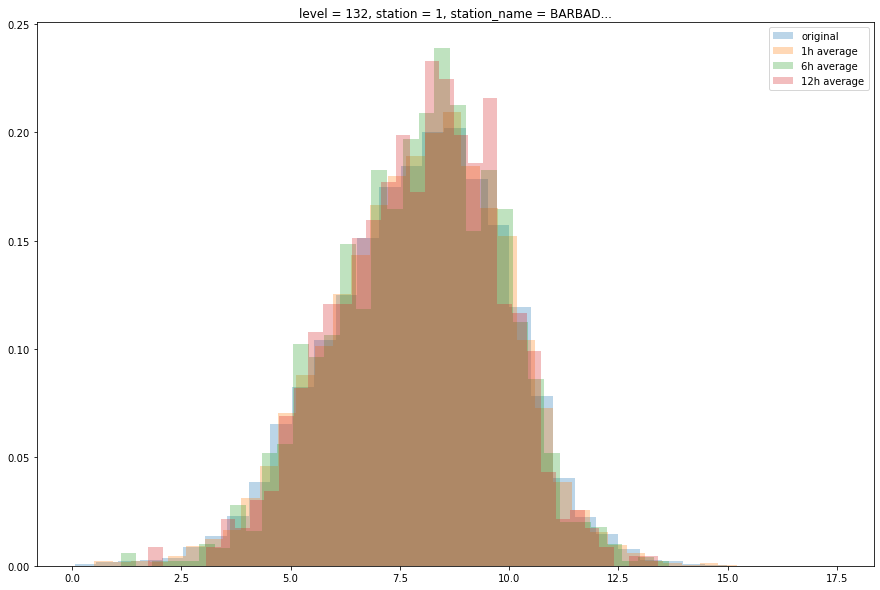

In [34]:
wind_speed_example.plot.hist(bins=35, alpha=0.3, density=True, label='original');
wind_speed_example.resample({'time': 'h'}).mean().plot.hist(bins=35, alpha=0.3, density=True, label='1h average');
wind_speed_example.resample({'time': '6h'}).mean().plot.hist(bins=35, alpha=0.3, density=True, label='6h average');
wind_speed_example.resample({'time': '12h'}).mean().plot.hist(bins=35, alpha=0.3, density=True, label='12h average');
plt.legend();